In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_circles,make_moons

In [20]:
X,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)


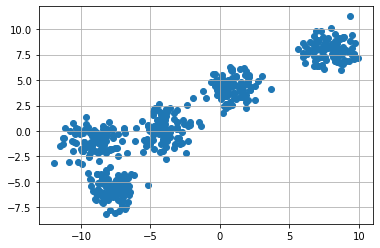

In [21]:
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [33]:
k=5

color=["green","red","blue","yellow","orange"]

clusters={}

for i in range(k):
    center=10*(2*np.random.random((X.shape[1],))-1)
    points=[]
    
    cluster={
        'center':center,
        'points':points,
        'color':color[i]
    }
    clusters[i]=cluster

In [34]:
# Assign every data point to one of the clusters
def assignPointToClusters(clusters): #E-Step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list 
                    
    

def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        #print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

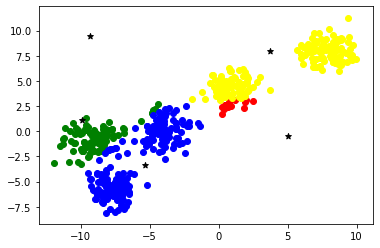

In [35]:
# Repeat this cell few times or put it inside a loop
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

In [36]:
#Problem with K-Means, is that it can fail sometimes on complex datasets

In [38]:
X,y=make_moons(n_samples=200,noise=0.10)

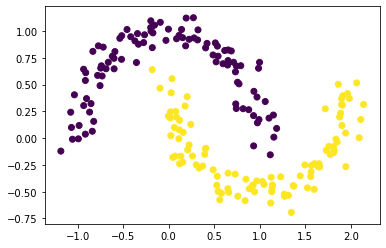

In [41]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [42]:
from sklearn.cluster import KMeans

In [43]:
km=KMeans(n_clusters=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

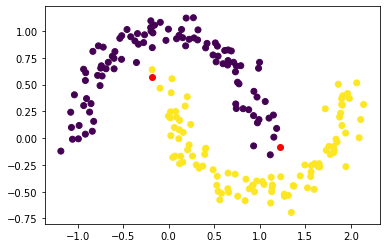

In [46]:
centers=km.cluster_centers_
labels=km.labels_

plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(centers[:,0],centers[:,1],color='red')
plt.show()

In [47]:
#DBSCAN

In [48]:
from sklearn.cluster import DBSCAN

In [49]:
dbs=DBSCAN

In [50]:
dbs=DBSCAN(eps=0.21,min_samples=5)

In [51]:
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.21, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [52]:
Ypred=dbs.fit_predict(X)

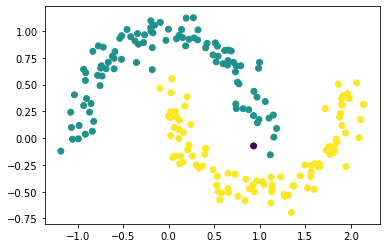

In [55]:
plt.scatter(X[:,0],X[:,1],c=Ypred)
plt.show()

In [56]:
#KMeans++
#we uses kmeans++ to overcome the initialization problem that is present in k means

In [57]:
X,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [59]:
from sklearn.cluster import KMeans

In [60]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
centers=kmeans.cluster_centers_

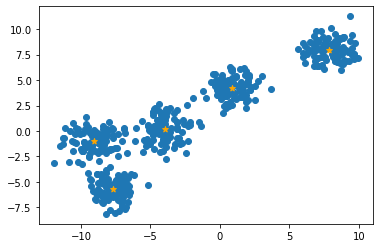

In [62]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],marker='*',color='orange')
plt.show()

In [63]:
pred=kmeans.labels_


In [66]:
#print(pred)

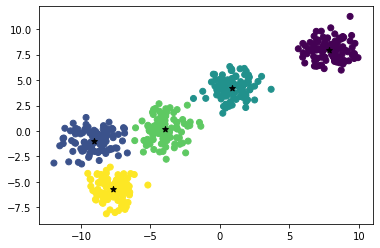

In [67]:
plt.scatter(X[:,0],X[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black')
plt.show()

In [85]:
X,y=make_blobs(n_samples=500,centers=5)

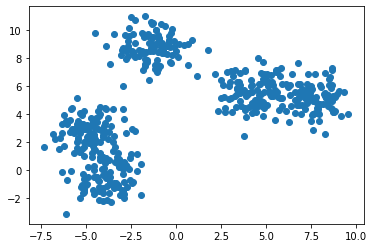

In [86]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [87]:
from sklearn.cluster import KMeans

In [94]:
kmeans=KMeans(n_clusters=5)

In [95]:
kmeans.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [99]:
labels=kmeans.labels_
centers=kmeans.cluster_centers_

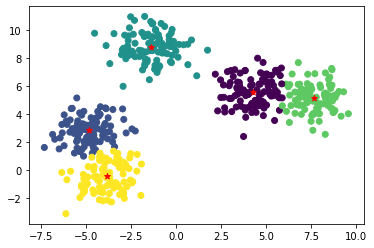

In [102]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='red')
plt.show()